# ÉCOLE IVADO/MILA EN APPRENTISSAGE PROFOND
# SESSION D' AUTOMNE 2018 
# Tutoriel : Données Catégorielles (MLP)

## Auteurs: 

Arsène Fansi Tchango <arsene.fansi.tchango@rd.mila.quebec>


## Préface

Ce tutoriel a pour but d'initier les participants aux aspects pratiques du Deep Learning  à travers la réalisation d'un projet simple de bout en bout. Dans le cadre de cet exercice, nous utiliserons le framework de développement <a href="https://pytorch.org/"> `PyTorch`</a>. Celui-ci a été choisie pour sa souplesse et sa flexibilité qui ont pour effet bénéfique de rendre la courbe d'apprentissage du framework facile.

# Initialisation

Avant de commencer, nous devons nous assurer d'installer les librairies nécessaires pour le tutoriel à l'aide de `pip`.  Pour se faire, exécutez la cellufle suivante en la sélectionnant et en cliquant `shift`+`Enter`. Ceci peut prendre quelques minutes.

In [1]:
!pip3 install torch torchvision Pillow matplotlib

    100% |████████████████████████████████| 519.5MB 28kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5977a000 @  0x7f72265892a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 61kB 21.4MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.


Afin de vous assurer que l'installation s'est bien faite, importez toutes les libraries et modules dont nous nous servirons pour ce tutoriel en exécutant la prochaine cellule:


In [3]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

use_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if use_gpu else "cpu")

print("Torch version: ", torch.__version__)
print("GPU Available: {}".format(use_gpu))

Torch version:  0.4.1
GPU Available: True


## PyTorch en bref

*PyTorch* est une librairie Python qui fournit deux fonctionnalités de haut niveau:
<ul>
<li> Opérations sur des tenseurs (comme NumPy) avec support GPU </li>
<li> Réseaux de neurones profonds construits sur un système de <b> différentiation automatique</b> appelé  <b> <a href="http://pytorch.org/docs/master/autograd.html">Autograd:  `torch.autograd`</a> </b>.</li>
</ul>
<br/>
Voici les documentations utiles relatives à ce sujet: 
<ul>
<li>  La documentation principale sur PyTorch: <a href="http://pytorch.org/docs/master/torch.html"> `Docs - PyTorch` .</a> </li>
<li>  La documentation principale  sur les réseaux de neurones: <a href="http://pytorch.org/docs/master/nn.html">`torch.nn`</a>. </li>
</ul>

En plus d'offrir des facilités pour définir et manipuler les réseaux de neuronnes, PyTorch offre plusieurs utilitaires pour le traitement des données. 
<br/> 
Un de ces utilitaires est la classe <b><a href="http://pytorch.org/docs/master/data.html#"> `torch.utils.data.Dataset`</a> </b> et ses sous-classes (`torch.utils.data.TensorDataset`, `torch.utils.data.Subset`, `etc...`) qui offrent une interface facile d'utilisation pour manipuler un jeu de données.
<br/>
Pour plus d'informations, veuillez vous reportez aux urls suivantes: 
<ul>
<li>Les jeux de données en PyTorch: <a href="http://pytorch.org/docs/master/data.html"> `Datasets - PyTorch` .</a>  </li>
<li>Un tutoriel pour le chargement des données: <a href="http://pytorch.org/tutorials/beginner/data_loading_tutorial.html"> `Data Loading Tutorial - PyTorch` .</a></li>
</ul>

## Elements nécessaires pour un projet






Pour mener à bien un projet en deep learning, on a besoin de:
<ul>
<li>Une <b> tâche à résoudre</b> ainsi que des <b>données</b> pour la supporter </li>
<li>Un <b>modèle</b> (réseau de neurones) à entraîner </li>
<li>Une <b>fonction de coût</b> à optimiser </li>
<li>Un <b>optimiseur</b> qui ajustera les paramètres (poids) du réseau de neurones</li>
</ul>

# DÉFINITION DE LA TÂCHE:  Prédiction de la survie suite à un naufrage

Notre objectif est de <b>prédire si un passager a survécu ou non suite au naufrage du Titanic</b> en se basant sur des données obtenues sur les passagers.

## Le dataset Titanic

Le jeu de données Titanic peut être téléchargé à l'adresse suivante:  https://github.com/afansi/winterschool18/blob/master/titanic3.csv?raw=true.<br/>
Cet ensemble de données fournit des informations sur le sort de 1309 passagers du premier voyage fatal du paquebot "Titanic", résumées par <br/>
statut économique (classe), sexe, âge, les informations familiales et survie. Cet ensembles de données est  également celui utilisé par le <br/>
concours Kaggle et permet ainsi de réduire  la barrière à l'entrée pour les utilisateurs débutants en apprentissage machine.


Nous utiliserons la librarire <a href="https://pandas.pydata.org/"> <b> Pandas </b></a>   pour charger en mémoire le jeu de données.

In [4]:
titanic_df = pd.read_csv(
    'https://github.com/afansi/winterschool18/blob/master/titanic3.csv?raw=true', 
    sep='\t', 
    index_col=None, 
    na_values=['NA']
)

# Un appeçu des données

titanic_df.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**La signification des différentes colonnes (features) est la suivante**:

<ol>

  <li> <b>pclass</b>: Classe du Passager (1 = première; 2 = seconde; 3 = troisième) </li>
  <li> <b>survived</b>: Survie (0 = non; 1 = oui) </li>
  <li> <b>name</b>: Nom </li>
  <li> <b>sex</b>: Sexe </li>
  <li> <b>age</b>: Âge </li>
  <li> <b>sibsp</b>: Nombre de frères, sœurs, ou conjoints à bord </li>
  <li> <b>parch</b>: Nombre de parents ou enfants à bord </li>
  <li> <b>ticket</b>: Numéro de ticket </li>
  <li> <b>fare</b>: Tarif passager </li>
  <li> <b>cabin</b>: Numéro de cabine </li>
  <li> <b>embarked</b>: Port d'embarquement (C = Cherbourg; Q = Queenstown; S = Southampton) </li>
  <li> <b>boat</b>: Canot de sauvetage (si le passager a survécu) </li>
  <li> <b>body</b>: Numéro de corps (si le passager n'a pas survécu et que son corps a été retrouvé) </li>
  <li> <b>home.dest</b>: la destination du passager </li>
 </ol>


## Prétraitement des données

Certaines données sont **moins importantes** que d'autres, par exemple:
<ol>
  <li> <b>name</b>: Nom </li>
  <li> <b>ticket</b>: Numéro de ticket </li>
  <li> <b>cabin</b>: Numéro de cabine </li>
  <li> <b>home.dest</b>: la destination du passager </li>
 </ol>
 


D'autres données sont **fortement** correlées à notre tâche, et les inclure reviendrait à **tricher**:
<ol>
  <li> <b>boat</b>: Canot de sauvetage (si le passager a survécu) </li>
  <li> <b>body</b>: Numéro de corps (si le passager n'a pas survécu et que son corps a été retrouvé) </li>
 </ol>
 

 
 
Par ailleurs, nous remarquons la présence des features de type **variables catégorielles**, il faut les transformer en données numériques avec de l'<a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">**encodage one-hot**</a>:
 <ol>
  <li> <b>pclass</b>: Classe du Passager </li>
  <li> <b>sex</b>: Sexe </li>
  <li> <b>embarked</b>: Port d'embarquement </li>
 </ol>  
  <br/>
 **Remarque:** La colonne <b>pclass</b> est apparemment numérique. Toutefois, cette représentation induit implicitement un biais. En effet, numériquement parlant, nous avons 1 (première classe) < 2 (secode classe) < 3 (troisième classe). On aurait pu multiplier cette colonne par `-1` pour réfléter notre société mais nous avons opté de rester neutre. 
 <br/>
 <br/>
 
 Le dataset pré-processé peut être téléchargé à l'adresse suivante:  https://github.com/afansi/winterschool18/blob/master/titanic_prepocess.csv?raw=true. 
 La signification des variables est la suivante:

<ol>
  <li> <b>survived</b>: Survie (0 = non; 1 = oui) </li>
  <li> <b>pclass_1</b>: (1 si passager en première classe; 0 sinon) </li>
  <li> <b>pclass_2</b>: (1 si passager en seconde classe; 0 sinon) </li>
  <li> <b>pclass_3</b>: (1 si passager en troisième classe; 0 sinon) </li>
  <li> <b>sex_female</b>: (1 si passager est une femme; 0 sinon) </li>
  <li> <b>sex_male</b>: (1 si passager est un homme; 0 sinon) </li>
  <li> <b>age</b>: Âge </li>
  <li> <b>sibsp</b>: Nombre de frères, sœurs, ou conjoints à bord </li>
  <li> <b>parch</b>: Nombre de parents ou enfants à bord </li>
  <li> <b>fare</b>: Tarif passager </li>
  <li> <b>embarked_C</b>: (1 si Port d'embarquement = Cherbourg (C); 0 sinon) </li> 
  <li> <b>embarked_Q</b>: (1 si Port d'embarquement = Queenstown (Q); 0 sinon) </li> 
  <li> <b>embarked_S</b>: (1 si Port d'embarquement = Southampton (S); 0 sinon)</li> 
 </ol>

In [5]:
titanic_preprocess_df = pd.read_csv(
    'https://github.com/afansi/winterschool18/blob/master/titanic_prepocess.csv?raw=true', 
    sep=',', 
    index_col=None
)

titanic_preprocess_df.head()

,survived,pclass_1,pclass_2,pclass_3,sex_female,sex_male,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,0,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,0,0,0,1,0.9167,1,2,151.5500,0,0,1
2,0,1,0,0,1,0,2.0000,1,2,151.5500,0,0,1
3,0,1,0,0,0,1,30.0000,1,2,151.5500,0,0,1
4,0,1,0,0,1,0,25.0000,1,2,151.5500,0,0,1


## Découpage en Train / Validation / Test

Lorsque celà n'a pas déjà été fait,  le dataset est divisé en trois parties:

<ol>
<li> <b> Train</b> (en général, 60 % du dataset): utilisée pour entraîner le modèle de classification.</li>   
<li> <b> Validation</b> (en général, 20 % du dataset): utilisée pour évaluer les performances du modèle en cours d'entraînement.</li>   
<li> <b> Test</b> (en général, 20 % du dataset): utilisée pour évaluer les performances de généralisation du modèle entraîné. </li>
</ol>

Nous utilisons la fonction [np.split](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.split.html) afin de séparer notre jeu de données en sous-ensembles.

In [0]:
np.random.seed(1234)
train, validate, test = np.split(
    titanic_preprocess_df.sample(frac=1, random_state=134), 
    [int(.6*len(titanic_preprocess_df)), int(.8*len(titanic_preprocess_df))])

X_train = train.drop(['survived'], axis=1).values
y_train = train['survived'].values

X_val = validate.drop(['survived'], axis=1).values
y_val = validate['survived'].values

X_test = test.drop(['survived'], axis=1).values
y_test = test['survived'].values

## Datasets en PyTorch

Nous utiliserons la sous-classe <b><a href="http://pytorch.org/docs/master/data.html#"> `torch.utils.data.TensorDataset`</a> </b> qui permet d'encapsuler ensemble les features et la target d'un jeu de données. Nous encapsulerons les données de Train, Validation, et Test définies dans la section précédente.


In [0]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())

val_dataset = TensorDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())

test_dataset = TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

# DEFINITION DU MODELE: Perceptron Multi-couche (MLP)


Un perceptron multi-couche est un réseau de neurones à propagation avant. Il prend en entrée les données à traiter, les transforme à travers une série de couches cachées et renvoie une prédiction en sortie.

La procédure d'apprentissage typique pour ce modèle consiste en :
<ul>
<li>Définir l'architecture du réseau. Cela définira les paramètres (non-linéarités, nombre de poids et biais) du réseau.</li>
<li>Définir la fonction de coût et l'optimiseur.</li>
<li>Entraîner le réseau.</li>
<li>Tester le réseau.</li>
</ul>

Pour résoudre notre tâche, nous allons utiliser un MLP avec les caractéristiques suivantes:
 <ul>
 <li> <b> 4 </b> **couches** (<b> 3 </b> couches cachées et <b> 1 </b> couche de sortie) </li>
 <li> la **dimension** des données d'**entrées** est de <b> 12 . </b></li>
 <li> les dimensions des différentes **couches intermédiaires** sont <b> 20, 40, 20, 2. </b> </li>
 <li> utilisation de la fonction d'activation <b> ReLu </b> pour les 3 couches cachées.</li>
 </ul>
 
 Voici un exemple d'architecture que nous allons utiliser: 
 
![Alt Text](https://github.com/mila-iqia/ecole_dl_mila_ivado/blob/master/tutoriaux/MLP/images/figures_tuto.png?raw=true)


## Implémentation du modèle en PyTorch

### 1 - Boîte à outils

<ul>
<li> La classe <b><a href="http://pytorch.org/docs/master/nn.html#module">`torch.nn.Module`</a></b>: 

    <br/> En PyTorch, tout réseau de neurones doit <b>hériter</b> de cette classe ou de ses descendantes (sous-classes).
    <br/> 
</li>   
<li> La méthode <b>`forward` (...)</b>: 
    <br/> Toute classe définissant un réseau de neurones doit <b>implémenter</b> la méthode  `forward(...)`. C'est cette méthode qui définit les opérations effectuées par le réseau de neurones et, le cas échéant, construit le graphe computationnel correspondant.
    <br/> 
</li>  
<li> La classe <b><a href="http://pytorch.org/docs/master/nn.html#torch.nn.Linear">`torch.nn.Linear(in_features, out_features)`</a></b>: 
    <br/> Cette classe implémente <b>une couche de réseau dense</b> sans fonction d'activation à sa sortie. <br/> Elle prend par défaut deux paramètres: 
    <ul>
    <li><b>`in_features`</b>: la dimension des données en entrée de la couche. </li>
    <li><b>`out_features`</b>: la dimension des données en sortie de la couche. </li>    
    </ul>
    
</li>
<li> Le module <b><a href="http://pytorch.org/docs/master/nn.html#torch-nn-functional">`torch.nn.functional`</a></b>: 
<br/> Il définit un ensemble de fonctions qui peuvent être appliquées aux sorties des différentes composantes d'un réseau de neurones. On y retrouve par example:
    <ul>
    <li> des fonctions non-lineaires: <b><a href="http://pytorch.org/docs/master/nn.html#id36">`sigmoid(...)`</a></b>, <b><a href="http://pytorch.org/docs/master/nn.html#id35">`tanh(...)`</a></b>, <b><a href="http://pytorch.org/docs/master/nn.html#id22">`relu(...)`</a></b>, <a href="http://pytorch.org/docs/master/nn.html#non-linear-activation-functions">`etc...`</a> </li> 
    <li> des fonctions de coûts: <b><a href="http://pytorch.org/docs/master/nn.html#mse-loss">`mse_loss(...)`</a></b>, <b><a href="http://pytorch.org/docs/master/nn.html#nll-loss">`nll(...)`</a></b>, <b><a href="http://pytorch.org/docs/master/nn.html#cross-entropy">`cross_entropy(...)`</a></b>, <a href="http://pytorch.org/docs/master/nn.html#id42">`etc ...`</a> </li> 
    <li> des fonctions de régularisation: <b><a href="http://pytorch.org/docs/master/nn.html#id38">`droupout(...)`</a></b>, <a href="http://pytorch.org/docs/master/nn.html#dropout-functions">`etc ...`</a>  </li> 
    <li> et <a href="http://pytorch.org/docs/master/nn.html#torch-nn-functional">`plein d'autres encore ...`</a> </li> 
    </ul>
    <br/> 
</li>
</ul>

 les méthodes suivantes sont à compléter :
<ul>
<li>La méthode `__init__` qui définit les couches. </li>
<li>La méthode `forward(input)` qui retourne l'`output`.</li>
</ul>

### 2 - Implémentation

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [0]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(12, 20)
        self.fc2 = nn.Linear(20, 40)
        self.fc3 = nn.Linear(40, 20)
        self.fc4 = nn.Linear(20, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        out = self.fc4(x)
        return out

## Exécution d'un réseau de neurones


Dans cette section, nous exécuterons notre réseau de neurones sur des données aloitoirement générées. 

### 1 - Boîte à outils
<b>Important à savoir:</b>
    En PyTorch, il existe deux modes d'exécution d'un réseau de neurones:
    <ul>
    <li> <b>train</b>: dans ce mode, tous les mécanismes d'apprentissage (construction du graphe computationnel, auto-différentiation) sont mis en place à chaque exécution du réseau. Il est utilisé lorsque le réseau est en cours d'entraînement.</li>
    <li> <b>eval</b>: dans ce mode, le modèle est en mode <b>inférence</b>. Il est utilisé lorsque le réseau est en cours d'évaluation.</li>
    </ul>
<br/>    
Nous utiliserons le mode <b>eval</b> dans cette section.

### 2 - Implémentation

In [11]:
# Instantiation du réseau
neural_net = NeuralNet()
neural_net = neural_net.to(device)
# activation du mode eval
neural_net = neural_net.eval()

# Sélection des 5 premières données du dataset de validation
data, target = val_dataset[0:5]
data = data.to(device)
target = target.to(device)
# Execution du réseau de neurones
output = neural_net(data)   # ou, en version longue, neural_net.forward(data)

# Tranformation des resultat en probabilités en utilisant la fonction SOFTMAX
output_proba = F.softmax(output, dim=1)

# Affichage des probabilités
print(output_proba)

tensor([[0.5176, 0.4824],
        [0.3129, 0.6871],
        [0.3483, 0.6517],
        [0.4888, 0.5112],
        [0.4927, 0.5073]], grad_fn=<SoftmaxBackward>)


Les lignes définissent la sortie du réseau, en terme de <b> probabilités sur deux classes</b>, <b>mort</b> (première colonne) ou <b>survie</b> (deuxième colonne), pour chacune des 5 données en entrée. Prenons le maximum de chaque prédiction comme la prédition de notre modèle et comparons les aux données réelles.

In [14]:
# Affichage des prédictions (classe ayant la plus grande probabilités)
_, prediction = torch.max(output_proba, dim=1)

print("Prédiction du modèle")
print(prediction)

# Affichage de la vrai target
print("Données réelles")
print(target)

Prédiction du modèle
tensor([0, 1, 1, 1, 1])
Données réelles
tensor([0, 0, 1, 0, 1])


### 3 - Questions: 

<b> Comment performe notre modèle?</b> <br/>
<b> Quelle serait une bonne manière de définir la performance? </b><br/>
<b>Comment pouvons-nous améliorer notre modèle?</b>

## Définir la fonction de coût et l'optimiseur

## Fonction de coût

La fonction de coût doit être définie en fonction de la tâche que nous souhaitons réaliser.

PyTorch offre <a href="http://pytorch.org/docs/master/nn.html#id42">une multitude de fonctions de coûts</a> prêtes à l'emploi.

Pour des problèmes de classification, la fonction de coût usuelle est <b> l'entropie croisée (cross-entropy)</b> et c'est elle que nous allons utiliser dans ce tutoriel. En PyTorch, elle est définie par la fonction <b><a href="http://pytorch.org/docs/master/nn.html#cross-entropy">`torch.nn.functional.cross_entropy`</a></b>.  L'entropie croisée est souvent utilisée en optimisation. Elle permet de comparer une distribution $p$ avec une distibution de référence $t$. Elle est minimum lorsque $t=p$. Sa formule pour la calculer entre la prédiction et la cible est : $-\sum_j t_{ij} \log(p_{ij})$ où $p$ est la prédiction, $t$ la cible, $i$ les exemples et $j$ les classes de la cible.

**Implémentation:**

In [0]:
import torch.nn.functional as F


def cost_function(prediction, target):
    loss = F.cross_entropy(prediction, target)
    return loss

## Rétro-propagation du gradient

En Pytorch, grâce au mécanisme de differentiation automatique <a href="http://pytorch.org/docs/master/notes/autograd.html">Autograd</a>, il est possible de calculer automatiquement le gradient de la fonction de coût et de le rétro-propager à travers le graphe computationnel.

Pour ce faire, une fois la fonction de coût calculée et stockée dans une variable, il suffit d'appeler la méthode <b> backward() </b> de cette dernière.<br/>
<br/>

**Snippet de rétro-propagation:**

loss = fonction_de_cout(...) <br/>
loss.backward()<br/>

## Optimiseur

PyTorch fournit un <a href="http://pytorch.org/docs/master/optim.html#algorithms">ensemble de méthodes d'optimisation (`torch.optim`)</a> couramment utilisées dans la communauté de Deep Learning. Parmi ces méthodes, on y retrouve notamment: 
<ul>
<li><b>SGD</b> (Stochastic Gradient Descent) <a href="http://pytorch.org/docs/master/optim.html#torch.optim.SGD">`torch.optim.SGD(net.parameters(), lr=learning_rate)`</a> qui est une implémentation de SGD.</li>
<li><b>Adam</b> (Adaptive Moment Estimation): variante de la méthode de descente de gradient dans laquelle le taux d'apprentissage est ajusté pour chaque paramètre. Cet ajustement est basé sur le momentum (moyenne glissante des gradients) et la courbure (moyenne glissante de la dérivée seconde). Cet optimiseur a démontré de très bonnes performamces par rapport à SGD dans la litérature.</li>
</ul>



Pour pouvoir utiliser un optimiseur en PyTorch, il faut l'instancier en lui passant les éléments suivants:
<ul>
<li><b>Les paramètres du réseau de neurones</b>: ceux-ci s'obtiennent à l'aide de la methode <b>parameters()</b> sur le modèle instanciée.</li>
<li><b>Le taux d'apprentissage (learning rate, lr)</b>: c'est le taux d'apprentissage à utiliser pour la mise à jour des paramètres du réseau de neurones pendant le processus d'optimization.</li>
<li>Il peut y avoir d'autres paramètres propres à l'optimiseur choisi</li>
</ul>


PyTorch offre un interface simplifiée pour interagir avec tout optimiseur:
<ul>
<li><b>zero_grad()</b>: Permet d'effacer les gradients des paramètres du réseau de neurones à optimiser. Elle est appelée <b>au début d'une étape d'optimisation</b> afin de re-initialiser les infos sur les paramètres à optimiser. </li>
<li><b>step()</b>: Permet d'effectuer une étape d'optimisation. Elle est appelée <b>après une étape de rétro-propagation du gradient</b>.</li>
</ul>

Dans ce tutoriel, nous utiliserons <b>Adam</b> avec une <b>lr</b> de 0.001.

**Implémentation: **

In [0]:
import torch.optim as optim

optimizer = optim.Adam(neural_net.parameters(), lr=0.001) 

# ENTRAÎNEMENT

## Epoch, Itération, Mini-batch

### 1- Définition 
<ol>
<li>
<b>Epoch</b> : une passe complète sur tout le dataset d'entraînement.
</li>

<li>
<b>Itération</b> : une mise à jour des paramètres du modèle (réseau de neurones). De nombreuses itérations peuvent se produire avant la fin d'un epoch.
</li>

<li>
<b>Mini-batch</b> : Sous-ensemble de données d'entrainement utilisées pour effectuer une mise à jour des paramètres du modèle. Autrement dit, à chaque itération, un mini-batch est utilisé. 
</li>

</ol>



### 2 - Mini-batch en PyTorch 

<ul>
<li>
PyTorch offre un utilitaire appelé <b><a href="http://pytorch.org/docs/master/data.html"> torch.utils.data.DataLoader </a></b> permettant de charger un dataset quelconque et de le découper automatiquement en mini-batchs.
</li>
</ul>

**Bon à savoir**: 

<ul>
<li>
Lors de l'entraînement, il est préférable que les données présentées au réseau apparaissent dans <b> un ordre différent d'un epoch à l'autre</b>.
</li>
</ul>

### 3 - Implémentation 

Nous allons préparer les `DataLoader` pour nos trois ensembles de données (Entraînement, Validation, et Test)

In [0]:
train_batch_size = 32  # nombre de données dans un batch d'entraînement.
eval_batch_size = 32   # nombre de données dans un batch d'évaluation.


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)

val_loader   = torch.utils.data.DataLoader(val_dataset, batch_size=eval_batch_size, shuffle=False)

test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=eval_batch_size, shuffle=False)

## Boucle principale

### 1 - CPU ou GPU

**Rappel:** <a href="http://pytorch.org/docs/master/cuda.html#module-torch.cuda">`torch.cuda`</a> est une fonction qui permet la prise en charge de tenseurs de types CUDA avec les mêmes fonctions que les tenseurs de types CPU mais utilisant pour le calcul des GPU. <a href="http://pytorch.org/docs/master/cuda.html#torch.cuda.is_available">`torch.cuda.is_available()`</a> retourne un booléen indiquant si CUDA est présentement disponible. 


**Conseil:** Definir une variable `device` qui contient le device sur lequel vous souhaitez utiliser pour l'entrainement. Pour passer un tenseur ou un modèle sur le device en question, utiliser la methode `.to(device)`.


In [0]:
use_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if use_gpu else "cpu")


### 2 - Implémentation

Nous définissons ici notre procédure d'entraînement pour un epoch.

In [0]:
def train(epoch, model, train_loader, optimizer, device):
    
    # mettre le modèle en mode train
    model.train()
    
    torch.set_grad_enabled(True)
    
    # Accumulateurs d'informations
    total_loss = 0
    correct = 0
    
    # itérer sur les batchs
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # Mettre les données sur le device
        data, target = data.to(device), target.to(device)
        
        # mettre à zéro les gradients des paramètres du réseau de neurones
        optimizer.zero_grad()
        
        # exécuter le réseau de neurones sur les données du batch
        prediction = model(data)
        
        # calculer la fonction de coût par rapport à la target
        loss = cost_function(prediction, target)
        
        # faire la retro-propagation du gradient
        loss.backward()
        
        # effectuer un étape d'optimisation
        optimizer.step()
        
        # effectuer la somme des coûts
        total_loss += loss.item()*len(data)
        
        # calculer le nombre de bonnes prédictions (classe correspondante à la valeur maximale en sortie) 
        _, pred_classes = torch.max(prediction, dim=1)        
        correct += pred_classes.eq(target.view_as(pred_classes)).sum().item()
        
        
        
    # calculer le coût moyen par epoch
    mean_loss = total_loss/len(train_loader.dataset)
    
    # calculer l'acurracy
    acc = correct / len(train_loader.dataset)
        
    print('Train Epoch: {}   Avg_Loss: {:.5f}   Acc: {}/{} ({:.3f}%)'.format(
        epoch, mean_loss, correct, len(train_loader.dataset),
        100. * acc))   
    
    # retourner le coût moyen obtenu
    return mean_loss, acc

## Procédure d'évaluation

Nous définissons ici notre procédure d'évaluation du modèle.
<br/>
En plus de passer le modèle en mode **eval**, il faut penser à désactiver le calcul du gradient (on n'en a pas besoin en mode inférence). <br/>
Pour celà, PyTorch offre un ensemble de gestionnaires de contexte permettant de désactiver/activer localement le calcul du gradient:
<ol>
<li>
<a href="https://pytorch.org/docs/0.4.0/torch.html#locally-disabling-gradient-computation">`torch.no_grad()`</a>: désactiver le calcul du gradient.
</li>

<li>
<a href="https://pytorch.org/docs/0.4.0/torch.html#locally-disabling-gradient-computation">`torch.enable_grad()`</a>: activer le calcul du gradient.
</li>

<li>
<a href="https://pytorch.org/docs/0.4.0/torch.html#locally-disabling-gradient-computation">`torch.set_grad_enabled(bool)`</a>: activer/désactiver le calcul du gradient.
</li>

</ol>



In [0]:
def evaluate(model, eval_loader, device):
    
    # mettre le modèle en mode eval
    model.eval()
    
    # Accumulateurs d'informations
    total_loss = 0
    correct = 0
    
    
    with torch.no_grad():
    
    # itérer sur les batchs
    for batch_idx, (data, target) in enumerate(eval_loader):

        # Mettre les données sur le device
        data, target = data.to(device), target.to(device)

        # exécuter le réseau de neurones sur les données du batch
        prediction = model(data)

        # calculer la fonction de coût par rapport à la target
        loss = cost_function(prediction, target)           


        # effectuer la somme des coûts
        total_loss += loss.item()*len(data)

        # calculer le nombre de bonnes prédictions (classe correspondante à la valeur maximale en sortie)
        _, pred_classes = torch.max(prediction, dim=1) 
        correct += pred_classes.eq(target.view_as(pred_classes)).sum().item()         
          
    
    # calculer le coût moyen
    mean_loss = total_loss/len(eval_loader.dataset)
    
    # calculer l'acurracy
    acc = correct / len(eval_loader.dataset)
        
    print('Eval:  Avg_Loss: {:.5f}   Acc: {}/{} ({:.3f}%)'.format(
        mean_loss, correct, len(eval_loader.dataset),
        100. * acc)) 
    
    # retourner le coût moyen obtenu
    return mean_loss, acc

## Checkpointing

Pour des phases d'entraînement qui requièrent beaucoup de temps, il est recommandé de sauvegarder les paramètres (poids) du réseau de neurones au fil de l'apprentissage. C'est ce que l'on appelle communément le <b> checkpointing</b>.

PyTorch offre <a href="http://pytorch.org/docs/master/notes/serialization.html">un mécanisme simple</a> pour effectuer cette opération. 





Nous implémentons ici deux méthodes:
<ul>
<li> la première pour <b> sauvegarder </b> un réseau de neurones </li>
<li> la seconde pour <b> charger </b> une sauvegarde de réseau de neurones </li>
</ul>

In [0]:
def save_model(epoch, model, path='./'):
    
    # creation du nom de fichier indexé par la valeur de l'epoch
    filename = path + 'neural_network_{}.pt'.format(epoch)
    
    # sauvegarde des paramètres du modèle.
    torch.save(model.state_dict(), filename)
    
    
    return model
    

In [0]:
def load_model(epoch, model, path='./'):
    
    # creation du nom de fichier indexé par la valeur de l'epoch
    filename = path + 'neural_network_{}.pt'.format(epoch)
    
    # chargement des paramètres du modèle sauvegardé.
    model.load_state_dict(torch.load(filename))
    
    
    return model

**Important à savoir:**  

Il est également possible de sauvegarder <b>l'état de l'optimiseur</b> en PyTorch. Ceci est très important dans les situations où nous souhaitons reprendre l'entraînement du réseau de neurones à partir d'une sauvegarde donnée. Pour plus d'informations, veuillez consulter l'url suivante: https://discuss.pytorch.org/t/saving-and-loading-a-model-in-pytorch/2610/3

## Entraînement

In [24]:
# nombre d'epochs
numEpochs = 200

# Frequence de sauvegarde
checkpoint_freq = 10

# Repertoire pour la sauvegarde des données
path = './'

# Accumulateurs des coûts moyens obtenu par epoch
train_losses = []
val_losses = []

# Accumulateurs des performances par epoch
train_accuracies = []
val_accuracies = []

# Définition du réseau de neuronnes
neural_net = NeuralNet()


# Mettre le réseau sur le device
neural_net = neural_net.to(device)

# définition de l'optimiseur
optimizer = optim.Adam(neural_net.parameters(), lr=0.001) 
# optimizer = optim.SGD(neural_net.parameters(), lr=0.001) 


# Itérer sur le nombre d'epochs
for epoch in range(1, numEpochs + 1):
    
    # entraîner le modèle avec le dataset de train
    train_loss, train_acc = train(epoch, neural_net, train_loader, optimizer, device)   
    
    # évaluer le modèle avec le dataset de validation
    val_loss, val_acc = evaluate(neural_net, val_loader, device)       
    
    # Sauvegarde des coûts obtenus
    train_losses.append(train_loss)    
    val_losses.append(val_loss)
    
    # Sauvegarde des performamces
    train_accuracies.append(train_acc)    
    val_accuracies.append(val_acc)
    
    # Checkpoint
    if epoch % checkpoint_freq ==0:
        save_model(epoch, neural_net, path)

# Sauvegarde du modèle à la fin de l'entraînement.
save_model(numEpochs, neural_net, path)
    
print("\n\n\nOptimization ended.\n")    


Train Epoch: 1   Avg_Loss: 0.69287   Acc: 344/625 (55.040%)
Eval:  Avg_Loss: 0.66714   Acc: 133/209 (63.636%)
Train Epoch: 2   Avg_Loss: 0.65068   Acc: 418/625 (66.880%)
Eval:  Avg_Loss: 0.63873   Acc: 137/209 (65.550%)
Train Epoch: 3   Avg_Loss: 0.63288   Acc: 419/625 (67.040%)
Eval:  Avg_Loss: 0.63616   Acc: 136/209 (65.072%)
Train Epoch: 4   Avg_Loss: 0.62606   Acc: 415/625 (66.400%)
Eval:  Avg_Loss: 0.61589   Acc: 140/209 (66.986%)
Train Epoch: 5   Avg_Loss: 0.61768   Acc: 417/625 (66.720%)
Eval:  Avg_Loss: 0.60510   Acc: 139/209 (66.507%)
Train Epoch: 6   Avg_Loss: 0.61198   Acc: 427/625 (68.320%)
Eval:  Avg_Loss: 0.61334   Acc: 144/209 (68.900%)
Train Epoch: 7   Avg_Loss: 0.60842   Acc: 435/625 (69.600%)
Eval:  Avg_Loss: 0.60039   Acc: 146/209 (69.856%)
Train Epoch: 8   Avg_Loss: 0.60025   Acc: 433/625 (69.280%)
Eval:  Avg_Loss: 0.65971   Acc: 121/209 (57.895%)
Train Epoch: 9   Avg_Loss: 0.60059   Acc: 422/625 (67.520%)
Eval:  Avg_Loss: 0.57870   Acc: 147/209 (70.335%)
Train Epoc

## Exécution du réseau de neurones avec des données réelles

In [33]:
# activation du mode eval
neural_net = neural_net.eval()

# Sélection des 10 premières données du dataset de validation
data, target = val_dataset[0:10]
data = data.to(device)
# Execution du réseau de neurones
output = neural_net(data)   # ou, en version longue, neural_net.forward(data)

# Tranformation des resultat en probabilités en utilisant la fonction SOFTMAX
output_proba = F.softmax(output, dim=1)

# Affichage des probabilités
print(output_proba)

tensor([[0.8423, 0.1577],
        [0.9622, 0.0378],
        [0.5178, 0.4822],
        [0.7668, 0.2332],
        [0.1343, 0.8657],
        [0.1159, 0.8841],
        [0.4826, 0.5174],
        [0.0515, 0.9485],
        [0.5029, 0.4971],
        [0.2109, 0.7891]], device='cuda:0', grad_fn=<SoftmaxBackward>)


In [34]:
# Affichage des prédictions (classe ayant la plus grande probabilités)
_, prediction = torch.max(output_proba, dim=1)

print("Prédiction du modèle")
print(prediction)

# Affichage de la vrai target
print("Données réelles")
print(target)

Prédiction du modèle
tensor([0, 0, 0, 0, 1, 1, 1, 1, 0, 1], device='cuda:0')
Données réelles
tensor([0, 0, 1, 0, 1, 1, 0, 1, 1, 1])


## Visualisation de la courbe d'apprentissage

La <b>visualisation de la courbe d'apprentissage</b> permet de détecter d'éventuels problèmes survenus lors de l'apprentissage, par exemple, l'overfitting (sur-apprentissage).

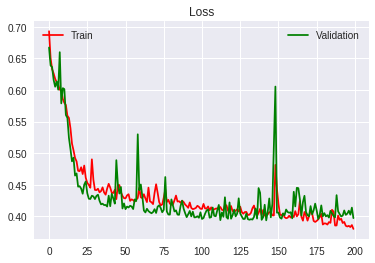

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(range(len(train_losses)))

ax = plt.subplot(111)
plt.plot(x, train_losses, 'r', label="Train")
plt.plot(x, val_losses, 'g', label="Validation")
plt.title('Loss')
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.99)

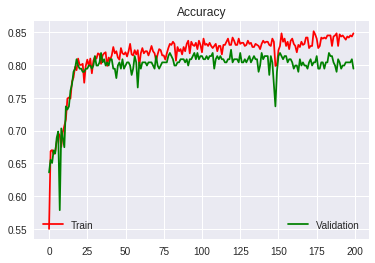

In [31]:
x = list(range(len(train_accuracies)))

ax = plt.subplot(111)
plt.plot(x, train_accuracies, 'r', label="Train")
plt.plot(x, val_accuracies, 'g', label="Validation")
plt.title('Accuracy')
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.99)

**Questions: **

<b> a) Que pouvez-vous dire de ces courbes ?  <br/>
Illustrent-ils un régime de sur-apprentissage? Si non, pourquoi? Si oui, que pouvez-vous faire pour y remédier?</b> <br/>
<b> b) Que pouvez-vous faire pour améliorer la performance du réseau de neurones sur des données de validation? </b><br/>

# ÉVALUATION

Nous pouvons finalement évaluer notre modèle apppris sur notre dataset de Test.

In [32]:
test_loss, test_acc = evaluate(neural_net, test_loader, device)

Eval:  Avg_Loss: 0.51039   Acc: 167/209 (79.904%)


**Questions: **

<b> a) Comparer les résultats de validation et de test ?  Le réseau appris généralise t'il aussi bien qu'espéré ? <br/>
b) Pensez-vous qu'il est possible d'utiliser un MLP pour d'autres types de données comme des image par exemple? </b> <br/>